
Merged DataFrame Head:
   pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0     2021000010        1              1          3             0     NaN   
1     2021000010        1              1          3             0     NaN   
2     2021000046        1              1          4             0     NaN   
3     2021000046        1              1          4             0     NaN   
4     2021000046        1              1          4             0     NaN   

   REHOV2  BAYIT  ZOMET_IRONI  kvish1  ...  NAFA  EZOR_TIVI  \
0     NaN    NaN          NaN    89.0  ...    45        245   
1     NaN    NaN          NaN    89.0  ...    45        245   
2     NaN    NaN          NaN    35.0  ...    12        612   
3     NaN    NaN          NaN    35.0  ...    12        612   
4     NaN    NaN          NaN    35.0  ...    12        612   

   MAAMAD_MINIZIPALI  ZURAT_ISHUV  STATUS_IGUN         X         Y  kvish  \
0               99.0           99            1  216335.0 

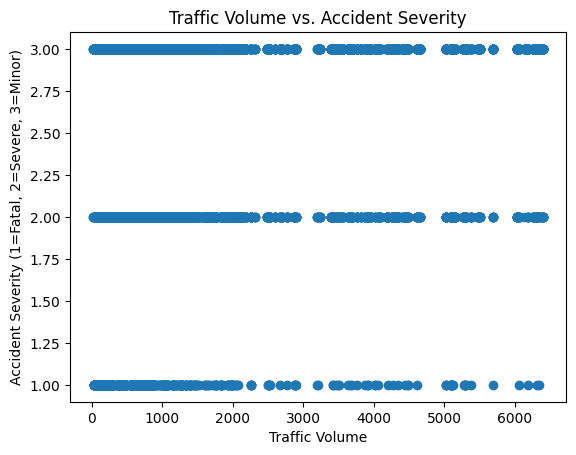


Geographic Coordinates in Merged DataFrame:
          X         Y
0  216335.0  768965.0
1  216335.0  768965.0
2  191181.0  613408.0
3  191181.0  613408.0
4  191181.0  613408.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the traffic count data
traffic_count_df = pd.read_csv('../count/THINGS WE DID/merged_traffic_count_with_coordinates.csv')

# Load the accident data
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')

# Rename columns for consistency in the accident data
accident_df.rename(columns={
    'HODESH_TEUNA': 'hodesh',
    'YOM_BASHAVUA': 'yom',
    'SHAA': 'shaa',
    'KVISH1': 'kvish1',
    'KVISH2': 'kvish2'
}, inplace=True)

# Aggregate traffic data by road segment and day of the week
aggregated_traffic_df = traffic_count_df.groupby(['kvish', 'keta', 'yom']).agg({
    'kamut_kle_rehev': 'mean'
}).reset_index()

# Merge the aggregated traffic data with the accident data using KVISH1
merged_df_kvish1 = pd.merge(
    accident_df, aggregated_traffic_df, 
    left_on=['kvish1', 'yom'], 
    right_on=['kvish', 'yom'], 
    how='inner'
)

# Merge the aggregated traffic data with the accident data using KVISH2
merged_df_kvish2 = pd.merge(
    accident_df, aggregated_traffic_df, 
    left_on=['kvish2', 'yom'], 
    right_on=['kvish', 'yom'], 
    how='inner'
)

# Combine both merges to get a complete dataset
merged_df = pd.concat([merged_df_kvish1, merged_df_kvish2]).drop_duplicates().reset_index(drop=True)

# Display the merged DataFrame
print("\nMerged DataFrame Head:")
print(merged_df.head())

# Analyze the correlation between traffic volume and accident severity
correlation = merged_df['kamut_kle_rehev'].corr(merged_df['HUMRAT_TEUNA'])
print(f"Correlation between traffic volume and accident severity: {correlation}")

# Visualize the relationship between traffic volume and accident severity
plt.scatter(merged_df['kamut_kle_rehev'], merged_df['HUMRAT_TEUNA'])
plt.xlabel('Traffic Volume')
plt.ylabel('Accident Severity (1=Fatal, 2=Severe, 3=Minor)')
plt.title('Traffic Volume vs. Accident Severity')
plt.show()

# Check if the merged data has the necessary geographic coordinates
print("\nGeographic Coordinates in Merged DataFrame:")
print(merged_df[['X', 'Y']].head())

# Export the merged DataFrame to a CSV file for QGIS
merged_df.to_csv('./merged_traffic_accidents_for_qgis.csv', index=False)
